In [3]:
path = "C:/Users/derra/Downloads/archive"

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import glob as glob 
from PIL import Image



def view_images(filenames, nb_elements = 5):
    nb_samples = len(filenames)
    
    nb_rows = ((nb_samples) // 5)
    
    fig, axes = plt.subplots(
        nrows = nb_rows, 
        ncols = min(5, nb_samples), 
        figsize = (min(5, nb_samples) * 4, nb_rows * 4)
    )
    
    for i in range(nb_samples):
        img_path = glob.glob(path+'/*/*/'+filenames[i])[0]
        img = Image.open(img_path)
        
        axes[i // 5, i % 5].imshow(np.array(img), cmap=plt.cm.gray, aspect='auto')
        axes[i // 5, i % 5].axis('off')
    
    fig.show()    

def view_images_on_single_row(filenames):
    nb_samples = len(filenames)
    fig, axes = plt.subplots(
        nrows = 1, 
        ncols = nb_samples,
        figsize = (20, 10)
    )
    for i in range(nb_samples):
        img_path = glob.glob(path+'/*/*/'+filenames[i])[0]
        img = Image.open(img_path)
        
        axes[i].imshow(np.array(img), cmap=plt.cm.gray, aspect='auto')
        axes[i].axis('off')
    
    fig.show()  

In [5]:
glob.glob(path+'/*/*/'+"00000001_000.png")[0]

'C:/Users/derra/Downloads/archive\\images_001\\images\\00000001_000.png'

In [6]:
df = pd.read_csv('Data_Entry_2017.csv')
df.head()

Image Index          Finding Labels  Follow-up #  Patient ID  \
0  00000001_000.png            Cardiomegaly            0           1   
1  00000001_001.png  Cardiomegaly|Emphysema            1           1   
2  00000001_002.png   Cardiomegaly|Effusion            2           1   
3  00000002_000.png              No Finding            0           2   
4  00000003_000.png                  Hernia            0           3   

   Patient Age Patient Gender View Position  OriginalImage[Width  Height]  \
0           58              M            PA                 2682     2749   
1           58              M            PA                 2894     2729   
2           58              M            PA                 2500     2048   
3           81              M            PA                 2500     2048   
4           81              F            PA                 2582     2991   

   OriginalImagePixelSpacing[x     y]  Unnamed: 11  
0                        0.143  0.143          NaN  
1                        0.143  0.143          NaN  
2                        0.168  0.168          NaN  
3                        0.171  0.171          NaN  
4                        0.143  0.143          NaN

renommer quelques colonnes : 

In [7]:

df = df.rename(columns={
    "OriginalImagePixelSpacing[x": "OriginalImagePixelSpacingX",
    "y]": "OriginalImagePixelSpacingY",
    "OriginalImage[Width": "OriginalImageWidth",
    "Height]": "OriginalImageHeight"
})

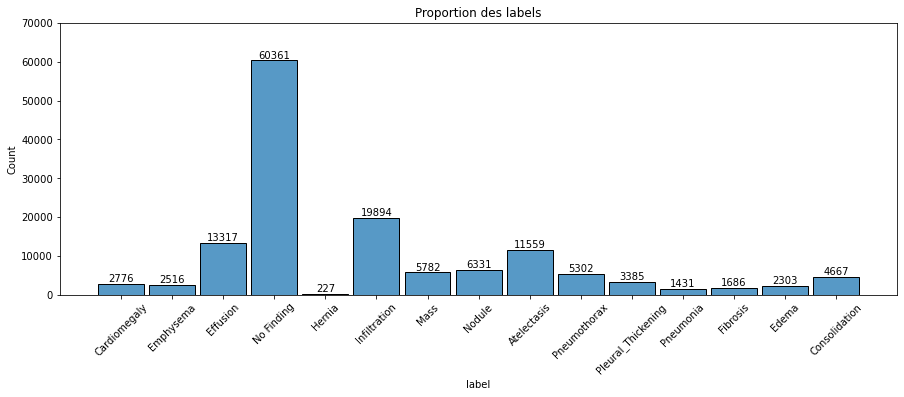

In [12]:
import seaborn as sns
def finding_Labels_p1(df):
    test = df.assign(var1=df['Finding Labels'].str.split('|')).explode('var1')["var1"]
    test = test.reset_index(drop=True).to_frame()
    test.columns = ["label"]

    fig, ax = plt.subplots(figsize=(15,5))
    ax.tick_params(axis='x', rotation=45)
    sns.histplot(test, x="label", discrete=True, ax=ax, shrink=.9).set_title("Proportion des labels")
    ax.bar_label(ax.containers[0])
    plt.ylim(0,70000)
    plt.show(sns)

finding_Labels_p1(df)

In [16]:
df_1 = df[df["Finding Labels"]!="No Finding"]
df_1.head()

Image Index          Finding Labels  Follow-up #  Patient ID  \
0  00000001_000.png            Cardiomegaly            0           1   
1  00000001_001.png  Cardiomegaly|Emphysema            1           1   
2  00000001_002.png   Cardiomegaly|Effusion            2           1   
4  00000003_000.png                  Hernia            0           3   
5  00000003_001.png                  Hernia            1           3   

   Patient Age Patient Gender View Position  OriginalImageWidth  \
0           58              M            PA                2682   
1           58              M            PA                2894   
2           58              M            PA                2500   
4           81              F            PA                2582   
5           74              F            PA                2500   

   OriginalImageHeight  OriginalImagePixelSpacingX  \
0                 2749                       0.143   
1                 2729                       0.143   
2                 2048                       0.168   
4                 2991                       0.143   
5                 2048                       0.168   

   OriginalImagePixelSpacingY  Unnamed: 11  
0                       0.143          NaN  
1                       0.143          NaN  
2                       0.168          NaN  
4                       0.143          NaN  
5                       0.168          NaN

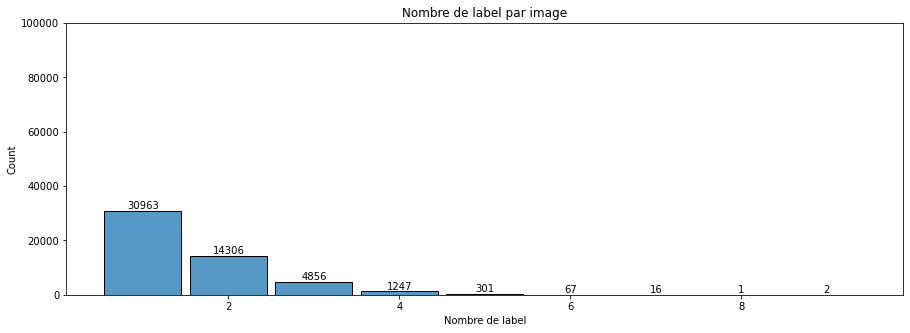

In [17]:
def finding_Labels_p2(df):
    
    test = df["Finding Labels"].str.count(r'\|') + 1
    test = test.reset_index(drop=True).to_frame()
    test.columns = ["Nombre de label"]

    fig, ax = plt.subplots(figsize=(15,5))
    sns.histplot(test, x="Nombre de label", discrete=True, ax=ax, shrink=.9).set_title("Nombre de label par image")
    ax.bar_label(ax.containers[0])
    plt.ylim(0,100000)
    plt.show(sns)
    
finding_Labels_p2(df_1)

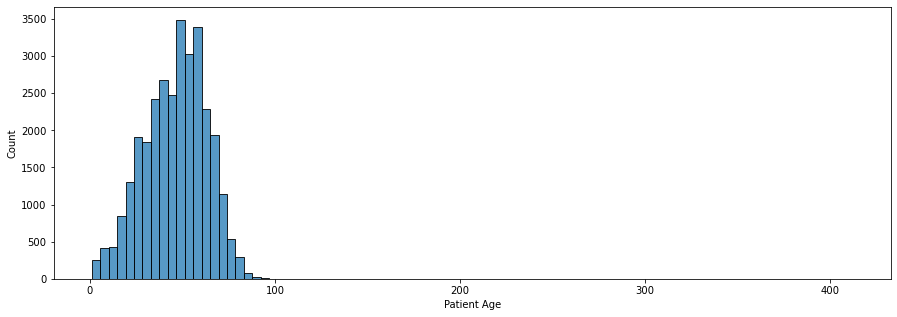

In [20]:
def patient_age_p1(df):
    test = df[df['Patient Age'] <= 120]
    test = df.groupby("Patient ID").agg('first')

    fig, ax = plt.subplots(figsize=(15,5))
    sns.histplot(test, x="Patient Age", ax=ax, bins=90)
    plt.show(sns)

patient_age_p1(df)

In [8]:
print(df.columns)


Index(['Image Index', 'Finding Labels', 'Follow-up #', 'Patient ID',
       'Patient Age', 'Patient Gender', 'View Position', 'OriginalImageWidth',
       'OriginalImageHeight', 'OriginalImagePixelSpacingX',
       'OriginalImagePixelSpacingY', 'Unnamed: 11'],
      dtype='object')


In [8]:
print("Nombre de patient unique :", len(df["Patient ID"].unique()))
#print("Nombre de maladies :", len(df["Finding Labels"].unique()))
print("Nombre des follow-up :", len(df["Follow-up #"].unique()))
print("Number of data :", len(df))

Nombre de patient unique : 30805
Nombre des follow-up : 184
Number of data : 112120


* ####Analyse de Follow-up

In [9]:
df["Follow-up #"].describe()

count    112120.000000
mean          8.573751
std          15.406320
min           0.000000
25%           0.000000
50%           3.000000
75%          10.000000
max         183.000000
Name: Follow-up #, dtype: float64

<AxesSubplot:>

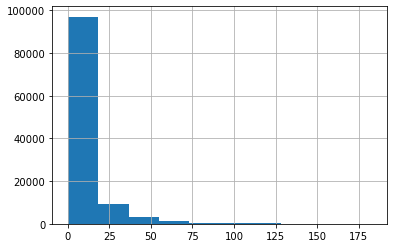

In [10]:
df["Follow-up #"].hist()

****Age analysis

In [11]:
df['Patient Age'].describe()

count    112120.000000
mean         46.901463
std          16.839923
min           1.000000
25%          35.000000
50%          49.000000
75%          59.000000
max         414.000000
Name: Patient Age, dtype: float64

<AxesSubplot:>

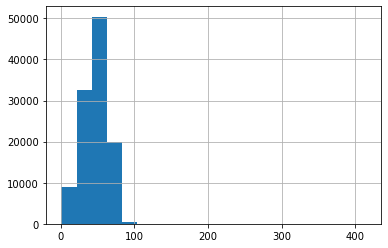

In [12]:
df['Patient Age'].hist(bins=20)


In [13]:

print("Nombre de personnes avec un age > 100 :", len(df[df['Patient Age'] > 100]))

Nombre de personnes avec un age > 100 : 16


<AxesSubplot:>

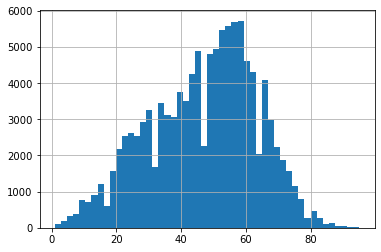

In [14]:
df[df['Patient Age'] <= 100]['Patient Age'].hist(bins=50)

As we can see through the histogram, we have a large portion of our data with an age of 20 and 65~70 with a peak at the age around 55.

We are going to analyze some of the image with an age of more than 100 years.

on peut voir sur l'histogramme que la lmajorité des données est avec un age entre 20 et 70 ans, le peak est à 55 ans

On analyse les données des personnes agés de plus de 100 ans pour voir ce que ça donne

C:\Users\derra\AppData\Local\Temp/ipykernel_8880/970310816.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


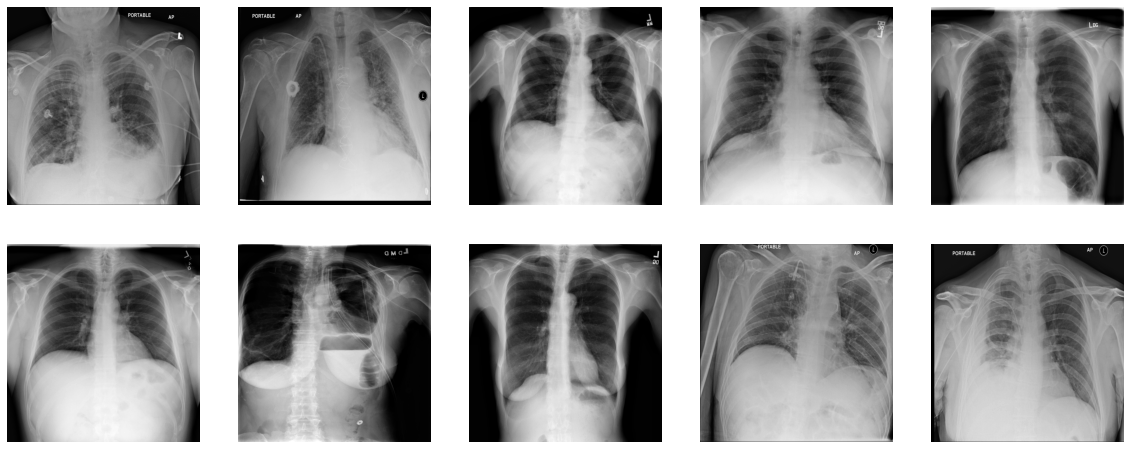

In [15]:
view_images(df[df['Patient Age'] > 100]['Image Index'].values[:10])

In [16]:
df["Patient Gender"].unique()

array(['M', 'F'], dtype=object)

In [17]:
print("Nombre de male: ", len(df[df["Patient Gender"] == 'M']))
print("Nombre de femelle  : ", len(df[df["Patient Gender"] == 'F']))

Nombre de male:  63340
Nombre de femelle  :  48780


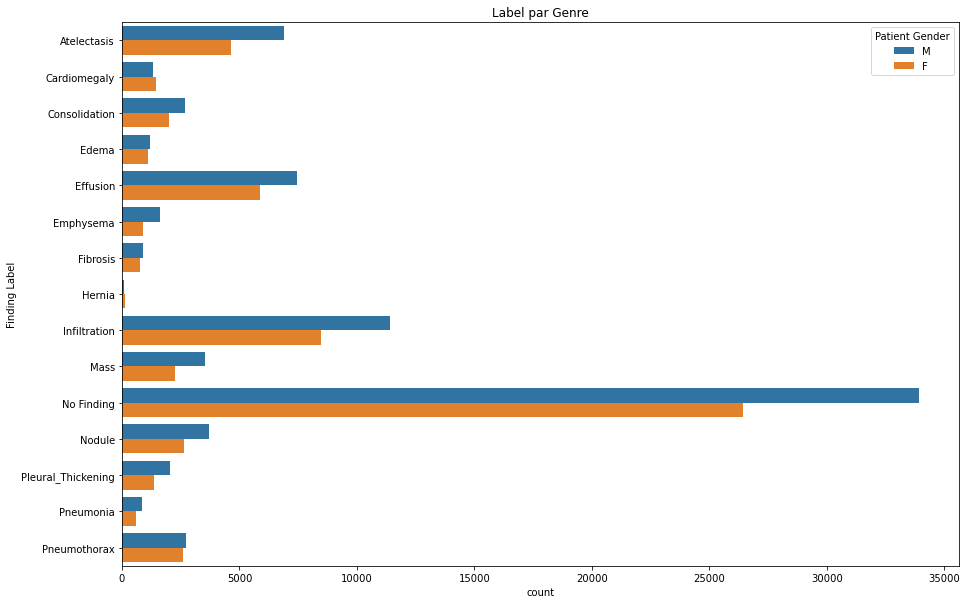

In [22]:
def labels_by_gender_p1(df):
    test = df.assign(var1=df['Finding Labels'].str.split('|')).explode('var1')
    plot_df = pd.DataFrame()

    for val in ["M", "F"]:
        test1 = test[test["Patient Gender"] == val].reset_index(drop=True)
        test1 = test1.groupby("var1").size().sort_index().reset_index(name="count")
        test1["Patient Gender"] = val

        plot_df = pd.concat([plot_df, test1]).reset_index(drop=True)

    plt.figure(figsize=(15, 10))
    plt.title("Label par Genre")
    ax = sns.barplot(y="var1", hue="Patient Gender", x="count", data=plot_df, orient = 'h')
    plt.ylabel("Finding Label")
    plt.show(sns)

labels_by_gender_p1(df)

<AxesSubplot:ylabel='Patient Gender'>

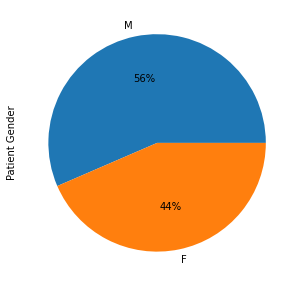

In [18]:
plt.figure(figsize=(5, 5))
df["Patient Gender"].value_counts().plot(kind='pie', autopct='%1.0f%%')

la majorité des données basé sur 56 males et 44 femelles
mais les données sont doublé donc on veut savoir combien dhmmes et de femmes qu'on a parmis les patients uniques 

In [19]:
print("Nombre de M parmis les patients uniques : ", len(df[(df["Follow-up #"] == 0) & (df["Patient Gender"] == 'M')]))
print("Nombre de F parmis les patients uniques : ", len(df[(df["Follow-up #"] == 0) & (df["Patient Gender"] == 'F')]))

Nombre de M parmis les patients uniques :  16630
Nombre de F parmis les patients uniques :  14175


**View position **


In [20]:
df['View Position'].unique()

array(['PA', 'AP'], dtype=object)

Afin d'analyser les poumons d'un patient, nous devons comprendre comment les images sont prises. La radiographie thoracique standard est acquise avec le patient debout et le faisceau de rayons X traversant le patient de l'arrière vers l'avant. C'est ce qu'on appelle la **projection postérieure-antérieure (PA)**. mettre une photo
https://www.kaggle.com/rerere/eda-nih-chest-x-rays

Malheureusement, parfois, il n'est pas possible d'acquérir une radiographie thoracique PA, car le patient est trop malade pour se tenir debout. Donc, nous devons adapter la projection et généralement nous prenons une **projection antérieure-postérieure (AP)**.

La zone analysée doit être la plus proche de l'écran. En effet, à partir d'un point physique, plus la distance entre l'objet et l'écran est faible, plus des ombres claires se forment. C'est la raison pour laquelle la projection PA est meilleure que la projection AP.

In [21]:
print("Number of AP : ", len(df[df["View Position"] == 'AP']))
print("Number of PA : ", len(df[df["View Position"] == 'PA']))

Number of AP :  44810
Number of PA :  67310


<AxesSubplot:ylabel='View Position'>

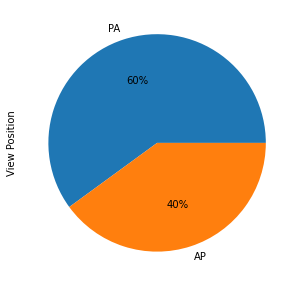

In [22]:
plt.figure(figsize=(5, 5))
df["View Position"].value_counts().plot(kind='pie', autopct='%1.0f%%')

In [23]:
pa_position = df[df["View Position"] == "PA"].sample(10)
ap_position = df[df["View Position"] == "AP"].sample(10)

C:\Users\derra\AppData\Local\Temp/ipykernel_8880/970310816.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


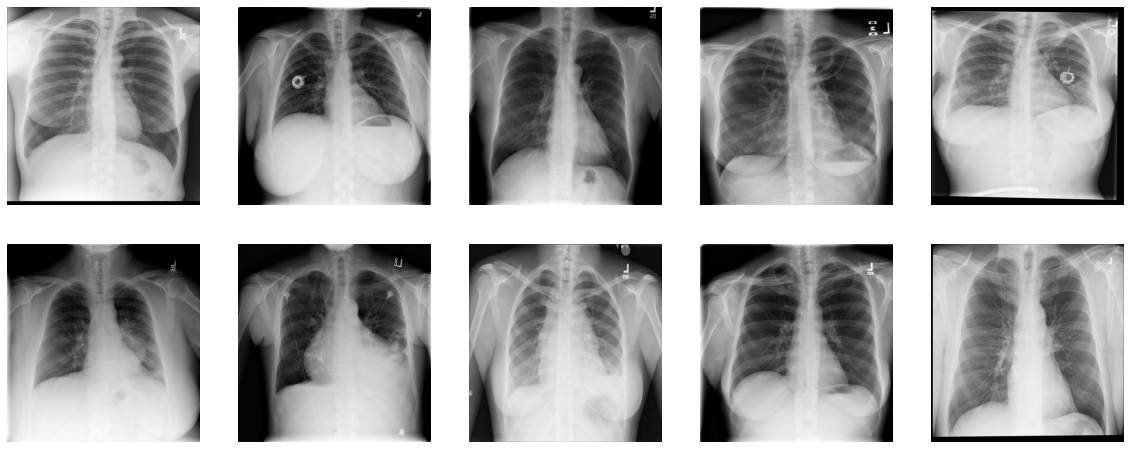

In [24]:
view_images(pa_position["Image Index"].values)

C:\Users\derra\AppData\Local\Temp/ipykernel_8880/970310816.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


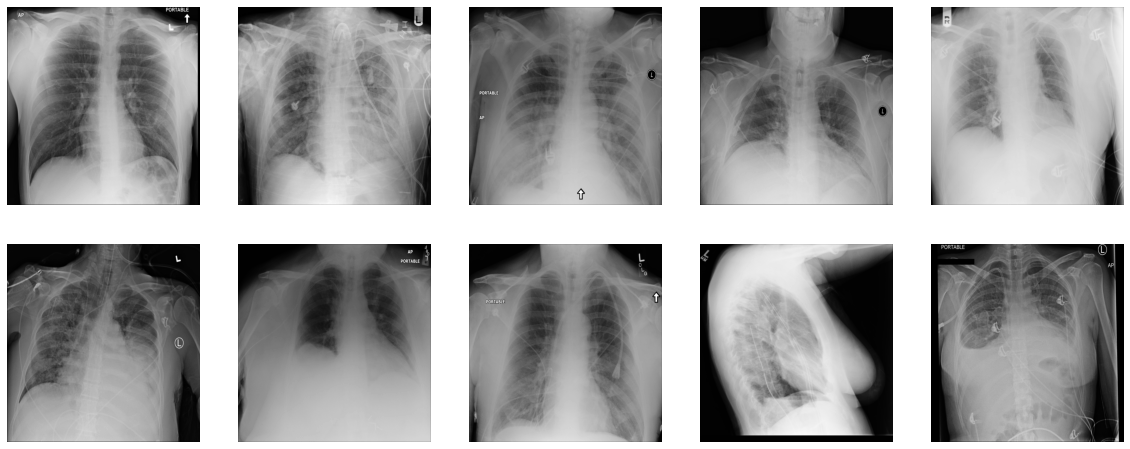

In [25]:
view_images(ap_position["Image Index"].values)

**Original Image Size Analysi**

In [26]:
df["OriginalImageWidth"].describe()

count    112120.000000
mean       2646.078844
std         341.246429
min        1143.000000
25%        2500.000000
50%        2518.000000
75%        2992.000000
max        3827.000000
Name: OriginalImageWidth, dtype: float64

on regarde quelques exemples

In [27]:
size = []
df.sample(1000).apply(lambda x : size.append(Image.open(glob.glob(path+'/*/*/00000001_000.png')[0]).size))
print(set(size))

{(1024, 1024)}


In [28]:
size = []
df.sample(1000).apply(lambda x : size.append(Image.open(glob.glob(path+'/*/*/*.png')[0]).size))
print(set(size))

{(1024, 1024)}


Comme nous pouvons le voir, nous ne semblons pas avoir la même taille annoncée par le dataframe. En effet, la taille minimale pour la largeur est de 1143. Or ici, nous avons 1024. Les données de l'image ont donc été redimensionnées. Cela pourrait avoir une influence lorsque nous formons notre modèle et essayons de le déployer pour un cas réel. En effet, si nous appliquons une autre méthode de réduction, nous pourrions avoir des données différentes et notre modèle d'apprentissage en profondeur pourrait agir différemment. C'est quelque chose que nous devons prendre en considération lors du déploiement d'un modèle.

**Original Image Pixel Spacing Analysis**

Pixel Spacing représente la distance entre les centres de deux pixels voisins.

<AxesSubplot:>

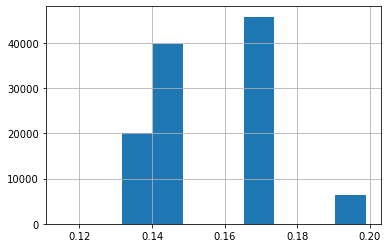

In [29]:
df['OriginalImagePixelSpacingX'].hist()

<AxesSubplot:>

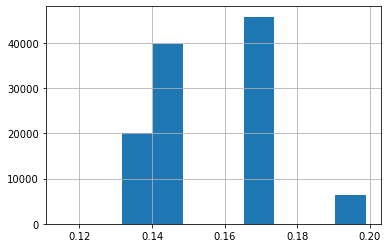

In [30]:
df['OriginalImagePixelSpacingY'].hist()

In [31]:
df['OriginalImagePixelSpacingX'].unique()

array([0.143   , 0.168   , 0.171   , 0.194311, 0.139   , 0.194314,
       0.194308, 0.115   , 0.1988  , 0.171001, 0.193754, 0.175   ,
       0.194317, 0.194329, 0.194336, 0.194301, 0.194323, 0.194304,
       0.194326, 0.193784, 0.185433, 0.148   , 0.192963])

In [32]:
len(df[df['OriginalImagePixelSpacingX'] != df['OriginalImagePixelSpacingY']])

#0
#Ici, tous les espacements de pixels sont égaux à partir des axes X et Y


0

**Finding Label**

In [33]:
df["Finding Labels"].head()


0              Cardiomegaly
1    Cardiomegaly|Emphysema
2     Cardiomegaly|Effusion
3                No Finding
4                    Hernia
Name: Finding Labels, dtype: object

In [34]:
df["Finding Labels"].describe()

count         112120
unique           836
top       No Finding
freq           60361
Name: Finding Labels, dtype: object

In [35]:
# voir les labels uniques
import itertools
unique_labels = set(itertools.chain.from_iterable(df["Finding Labels"].apply(lambda x : x.split('|')).values)) 
print(unique_labels)

{'Edema', 'Pleural_Thickening', 'Pneumothorax', 'Pneumonia', 'Infiltration', 'Consolidation', 'Hernia', 'Cardiomegaly', 'Effusion', 'Atelectasis', 'Fibrosis', 'Emphysema', 'Mass', 'Nodule', 'No Finding'}


Edema : 2303
Pleural_Thickening : 3385
Pneumothorax : 5302
Pneumonia : 1431
Infiltration : 19894
Consolidation : 4667
Hernia : 227
Cardiomegaly : 2776
Effusion : 13317
Atelectasis : 11559
Fibrosis : 1686
Emphysema : 2516
Mass : 5782
Nodule : 6331
No Finding : 60361


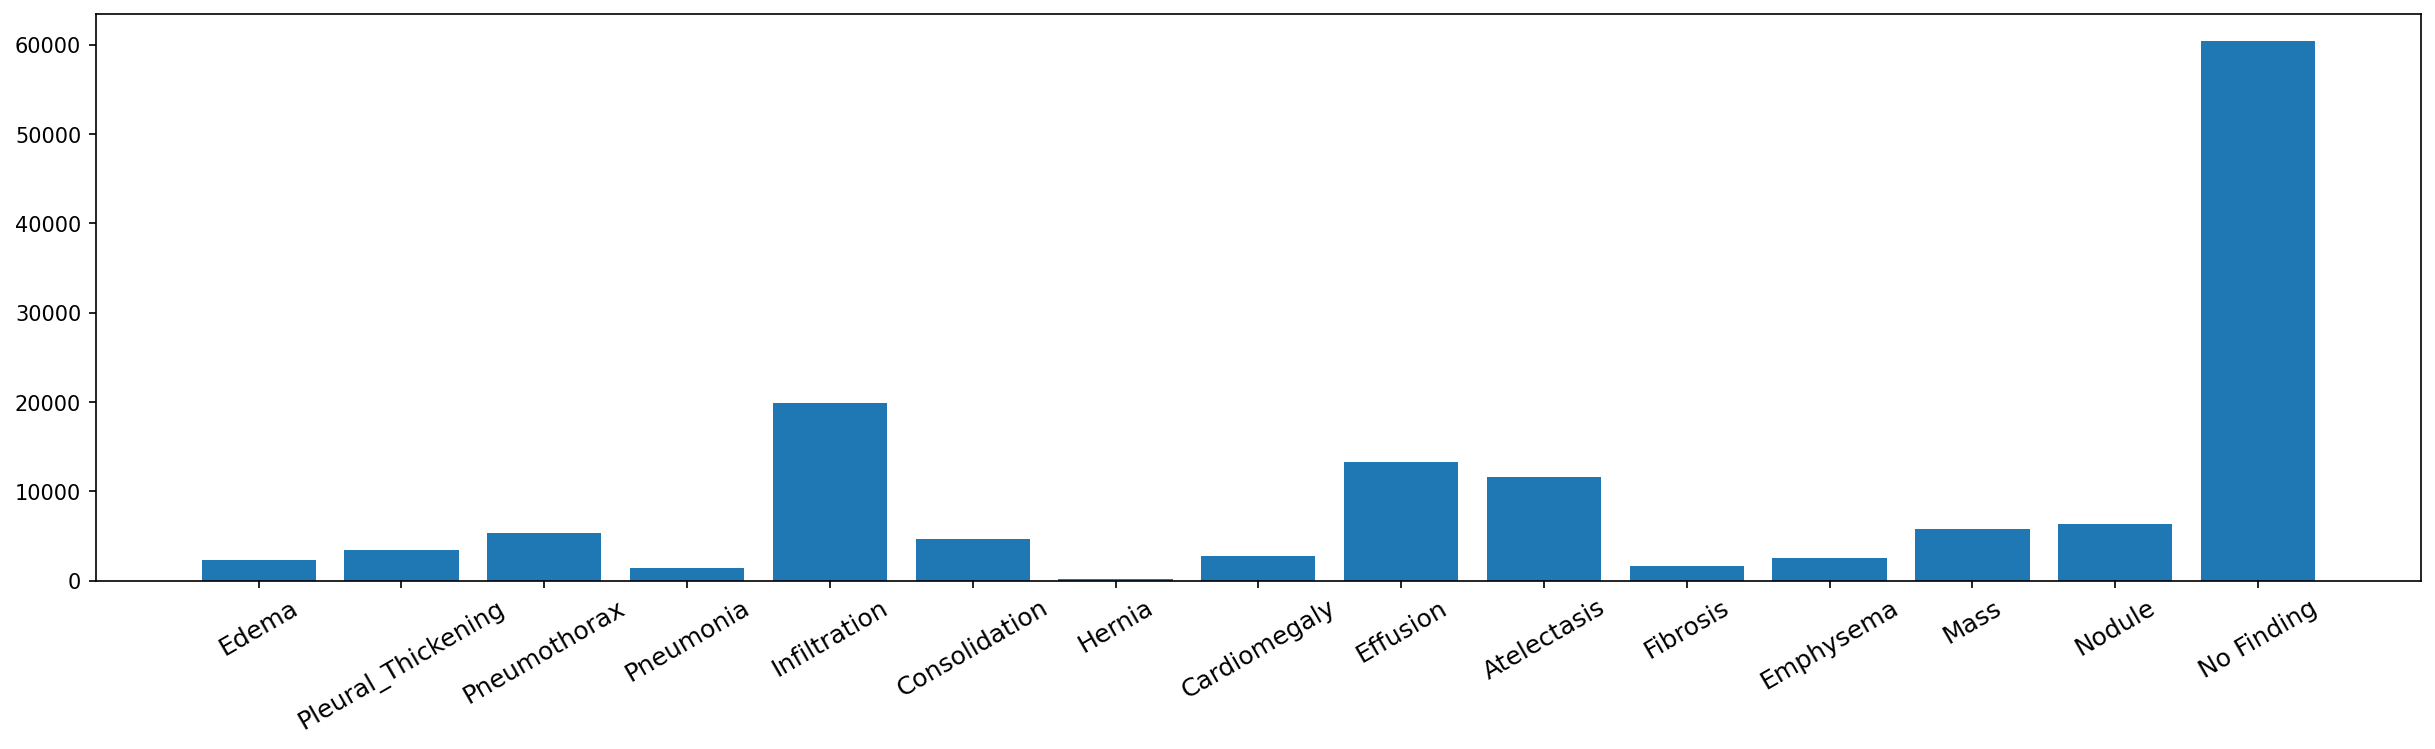

In [36]:
#mettre tout les labels dans une liste 

all_label = list(itertools.chain.from_iterable(df["Finding Labels"].apply(lambda x : x.split('|')).values)) 
#compter les vals pour chaques labels
counter = {}
for label in unique_labels :
    print(label, ":", all_label.count(label))
    counter[label] = all_label.count(label)
    
# Show this repartion in a bar plot
plt.figure(figsize=(20, 5), dpi=150)
plt.bar(counter.keys(), counter.values())
plt.xticks(range(len(counter)), counter.keys(), rotation=30, fontsize=12)
plt.show()

#ici, nous allons transformer nos étiquettes originales en un seul format . Ainsi, au lieu d'avoir chaque étiquette dans une colonne séparée par un '|', nous allons créer une colonne pour chaque étiquette et attribuer un 1 si l'étiquette est présente, sinon un 0

In [37]:
# Initialize a empty matrix 
one_hot_labels = pd.DataFrame(0.0, index=np.arange(len(df)), columns=unique_labels)

# For each row, we get the associated labels and set a 1 to the new corresponding column label 
for index, row in df.iterrows():
    labels = row["Finding Labels"].split('|')
    for label in labels:
        one_hot_labels.iloc[index][label] = 1.0

# Then, we concatane this new dataframe to our original data
df = pd.concat([df, one_hot_labels], axis=1)
df.head()

Image Index          Finding Labels  Follow-up #  Patient ID  \
0  00000001_000.png            Cardiomegaly            0           1   
1  00000001_001.png  Cardiomegaly|Emphysema            1           1   
2  00000001_002.png   Cardiomegaly|Effusion            2           1   
3  00000002_000.png              No Finding            0           2   
4  00000003_000.png                  Hernia            0           3   

   Patient Age Patient Gender View Position  OriginalImageWidth  \
0           58              M            PA                2682   
1           58              M            PA                2894   
2           58              M            PA                2500   
3           81              M            PA                2500   
4           81              F            PA                2582   

   OriginalImageHeight  OriginalImagePixelSpacingX  ...  Consolidation  \
0                 2749                       0.143  ...            0.0   
1                 2729                       0.143  ...            0.0   
2                 2048                       0.168  ...            0.0   
3                 2048                       0.171  ...            0.0   
4                 2991                       0.143  ...            0.0   

   Hernia  Cardiomegaly  Effusion  Atelectasis  Fibrosis  Emphysema  Mass  \
0     0.0           1.0       0.0          0.0       0.0        0.0   0.0   
1     0.0           1.0       0.0          0.0       0.0        1.0   0.0   
2     0.0           1.0       1.0          0.0       0.0        0.0   0.0   
3     0.0           0.0       0.0          0.0       0.0        0.0   0.0   
4     1.0           0.0       0.0          0.0       0.0        0.0   0.0   

   Nodule  No Finding  
0     0.0         0.0  
1     0.0         0.0  
2     0.0         0.0  
3     0.0         1.0  
4     0.0         0.0  

[5 rows x 27 columns]

In [38]:
#correlation between the different labels.
df[unique_labels].corr()

Edema  Pleural_Thickening  Pneumothorax  Pneumonia  \
Edema               1.000000           -0.002032     -0.022487   0.173996   
Pleural_Thickening -0.002032            1.000000      0.031661   0.002227   
Pneumothorax       -0.022487            0.031661      1.000000  -0.009984   
Pneumonia           0.173996            0.002227     -0.009984   1.000000   
Infiltration        0.094208            0.020381      0.000576   0.073020   
Consolidation       0.020822            0.028733      0.000485   0.025235   
Hernia             -0.002326            0.001330     -0.001621   0.000182   
Cardiomegaly        0.028318            0.009121     -0.022248   0.002848   
Effusion            0.062092            0.072009      0.047571   0.024322   
Atelectasis        -0.003397            0.025202      0.031422   0.029911   
Fibrosis           -0.013243            0.053578      0.000094  -0.006867   
Emphysema          -0.009204            0.026408      0.178175  -0.004888   
Mass                0.002910            0.065388      0.029940  -0.001005   
Nodule              0.000261            0.049649      0.007576  -0.003719   
No Finding         -0.156386           -0.190537     -0.240593  -0.122787   

                    Infiltration  Consolidation    Hernia  Cardiomegaly  \
Edema                   0.094208       0.020822 -0.002326      0.028318   
Pleural_Thickening      0.020381       0.028733  0.001330      0.009121   
Pneumothorax            0.000576       0.000485 -0.001621     -0.022248   
Pneumonia               0.073020       0.025235  0.000182      0.002848   
Infiltration            1.000000       0.045926 -0.003780      0.014189   
Consolidation           0.045926       1.000000 -0.005413      0.015360   
Hernia                 -0.003780      -0.005413  1.000000      0.001762   
Cardiomegaly            0.014189       0.015360  0.001762      1.000000   
Effusion                0.118136       0.101130 -0.003656      0.130094   
Atelectasis             0.093131       0.108943  0.010830      0.015819   
Fibrosis                0.008794       0.003236  0.007478      0.004837   
Emphysema               0.000406      -0.000521 -0.001466     -0.007090   
Mass                    0.014047       0.074573  0.011927     -0.010682   
Nodule                  0.042749       0.031819 -0.002422     -0.012123   
No Finding             -0.501556      -0.225058 -0.048640     -0.172067   

                    Effusion  Atelectasis  Fibrosis  Emphysema      Mass  \
Edema               0.062092    -0.003397 -0.013243  -0.009204  0.002910   
Pleural_Thickening  0.072009     0.025202  0.053578   0.026408  0.065388   
Pneumothorax        0.047571     0.031422  0.000094   0.178175  0.029940   
Pneumonia           0.024322     0.029911 -0.006867  -0.004888 -0.001005   
Infiltration        0.118136     0.093131  0.008794   0.000406  0.014047   
Consolidation       0.101130     0.108943  0.003236  -0.000521  0.074573   
Hernia             -0.003656     0.010830  0.007478  -0.001466  0.011927   
Cardiomegaly        0.130094     0.015819  0.004837  -0.007090 -0.010682   
Effusion            1.000000     0.172445 -0.002776   0.011198  0.070710   
Atelectasis         0.172445     1.000000  0.011130   0.032599  0.018953   
Fibrosis           -0.002776     0.011130  1.000000  -0.000908  0.009959   
Emphysema           0.011198     0.032599 -0.000908   1.000000  0.023213   
Mass                0.070710     0.018953  0.009959   0.023213  1.000000   
Nodule              0.019114    -0.007967  0.022478  -0.007062  0.101253   
No Finding         -0.396464    -0.366126 -0.133433  -0.163617 -0.251814   

                      Nodule  No Finding  
Edema               0.000261   -0.156386  
Pleural_Thickening  0.049649   -0.190537  
Pneumothorax        0.007576   -0.240593  
Pneumonia          -0.003719   -0.122787  
Infiltration        0.042749   -0.501556  
Consolidation       0.031819   -0.225058  
Hernia             -0.002422   -0.048640  
Cardiomegaly       -0.012123

C:\Users\derra\AppData\Local\Temp/ipykernel_8880/4290488315.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)


<AxesSubplot:>

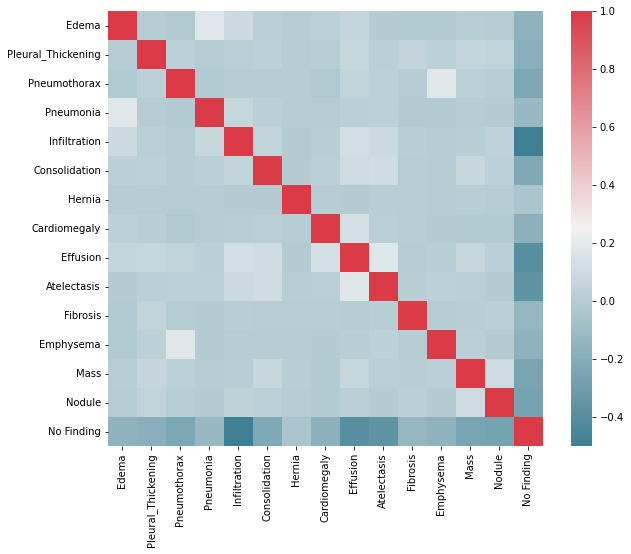

In [39]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = df[unique_labels].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)

Grâce à cette carte thermique, nous pouvons constater que "No Finding" est négativement corrélé aux autres étiquettes. C'est un comportement normal. Concernant les autres étiquettes, on notera celles supérieures à 0,1. Ainsi, nous avons :

Epanchement et Atélectasie : 0.172445
Emphysème et Pneumothorax : 0,178175
Epanchement et Cardiomégalie : 0.130094
Eudème et Pneumonie : 0.173996
Consolidation et Epanchement : 0.101130
C'est très intéressant, car on peut voir des liens entre les labels. Une autre étape consistera à comprendre ces étiquettes afin de voir si elles sont liées d'un point de vue médical.

In [2]:
data

NameError: name 'data' is not defined

In [40]:
# We are going to check if "No Finding" could have another label associate with.
findings = unique_labels.copy()
findings.remove("No Finding")

len(df[df["No Finding"] == 1 & df[findings].any(1)])

0

Ainsi, l'étiquette "No Findings" n'est pas associée à une autre étiquette. Nous allons compter le nombre d'éléments avec plusieurs étiquettes.

In [41]:
previous = 0
for i in range(len(unique_labels) + 1):
    cummulate_sum = len(df[df[unique_labels].sum(axis=1) <= i][unique_labels])
    print("When we have", str(i), "label, we have :", cummulate_sum - previous, "data.")
    previous = cummulate_sum

When we have 0 label, we have : 0 data.
When we have 1 label, we have : 91324 data.
When we have 2 label, we have : 14306 data.
When we have 3 label, we have : 4856 data.
When we have 4 label, we have : 1247 data.
When we have 5 label, we have : 301 data.
When we have 6 label, we have : 67 data.
When we have 7 label, we have : 16 data.
When we have 8 label, we have : 1 data.
When we have 9 label, we have : 2 data.
When we have 10 label, we have : 0 data.
When we have 11 label, we have : 0 data.
When we have 12 label, we have : 0 data.
When we have 13 label, we have : 0 data.
When we have 14 label, we have : 0 data.
When we have 15 label, we have : 0 data.


In [42]:
df[unique_labels]

Edema  Pleural_Thickening  Pneumothorax  Pneumonia  Infiltration  \
0         0.0                 0.0           0.0        0.0           0.0   
1         0.0                 0.0           0.0        0.0           0.0   
2         0.0                 0.0           0.0        0.0           0.0   
3         0.0                 0.0           0.0        0.0           0.0   
4         0.0                 0.0           0.0        0.0           0.0   
...       ...                 ...           ...        ...           ...   
112115    0.0                 0.0           0.0        1.0           0.0   
112116    0.0                 0.0           0.0        0.0           0.0   
112117    0.0                 0.0           0.0        0.0           0.0   
112118    0.0                 0.0           0.0        0.0           0.0   
112119    0.0                 0.0           0.0        0.0           0.0   

        Consolidation  Hernia  Cardiomegaly  Effusion  Atelectasis  Fibrosis  \
0                 0.0     0.0           1.0       0.0          0.0       0.0   
1                 0.0     0.0           1.0       0.0          0.0       0.0   
2                 0.0     0.0           1.0       1.0          0.0       0.0   
3                 0.0     0.0           0.0       0.0          0.0       0.0   
4                 0.0     1.0           0.0       0.0          0.0       0.0   
...               ...     ...           ...       ...          ...       ...   
112115            0.0     0.0           0.0       0.0          0.0       0.0   
112116            0.0     0.0           0.0       0.0          0.0       0.0   
112117            0.0     0.0           0.0       0.0          0.0       0.0   
112118            0.0     0.0           0.0       0.0          0.0       0.0   
112119            0.0     0.0           0.0       0.0          0.0       0.0   

        Emphysema  Mass  Nodule  No Finding  
0             0.0   0.0     0.0         0.0  
1             1.0   0.0     0.0         0.0  
2             0.0   0.0     0.0         0.0  
3             0.0   0.0     0.0         1.0  
4             0.0   0.0     0.0         0.0  
...           ...   ...     ...         ...  
112115        0.0   1.0     0.0         0.0  
112116        0.0   0.0     0.0         1.0  
112117        0.0   0.0     0.0         1.0  
112118        0.0   0.0     0.0         1.0  
112119        0.0   0.0     0.0         1.0  

[112120 rows x 15 columns]

In [43]:
df[df[unique_labels].sum(axis=1) == 9][unique_labels]

Edema  Pleural_Thickening  Pneumothorax  Pneumonia  Infiltration  \
83884    0.0                 1.0           1.0        0.0           1.0   
96044    1.0                 1.0           0.0        1.0           1.0   

       Consolidation  Hernia  Cardiomegaly  Effusion  Atelectasis  Fibrosis  \
83884            1.0     0.0           0.0       1.0          1.0       1.0   
96044            1.0     0.0           0.0       1.0          1.0       0.0   

       Emphysema  Mass  Nodule  No Finding  
83884        0.0   1.0     1.0         0.0  
96044        0.0   1.0     1.0         0.0

C:\Users\derra\AppData\Local\Temp/ipykernel_8880/970310816.py:44: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


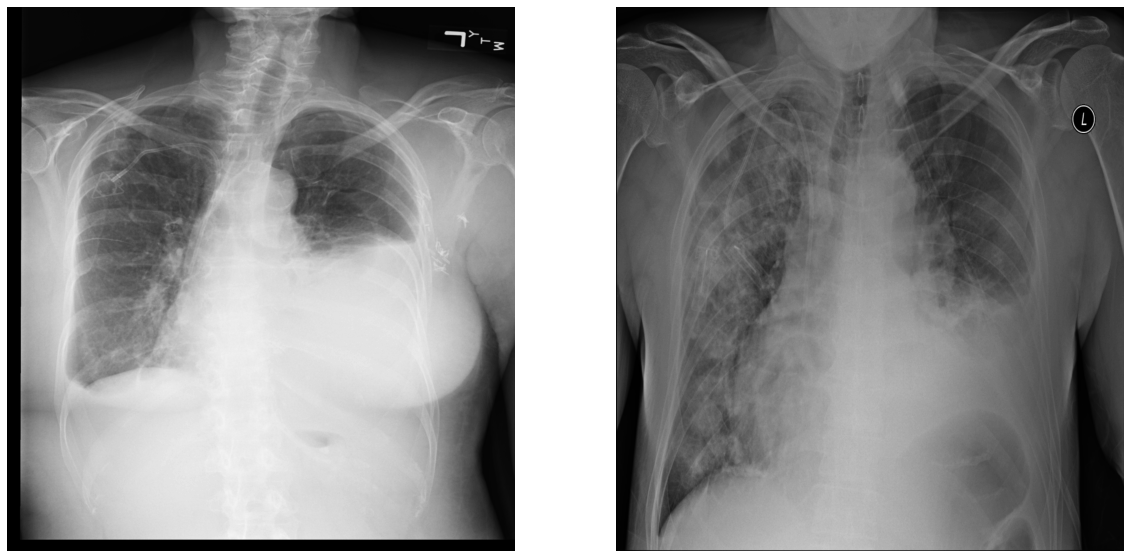

In [44]:
view_images_on_single_row(df[df[unique_labels].sum(axis=1) == 9]['Image Index'].values)

**autre exemple **

C:\Users\derra\AppData\Local\Temp/ipykernel_8880/970310816.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


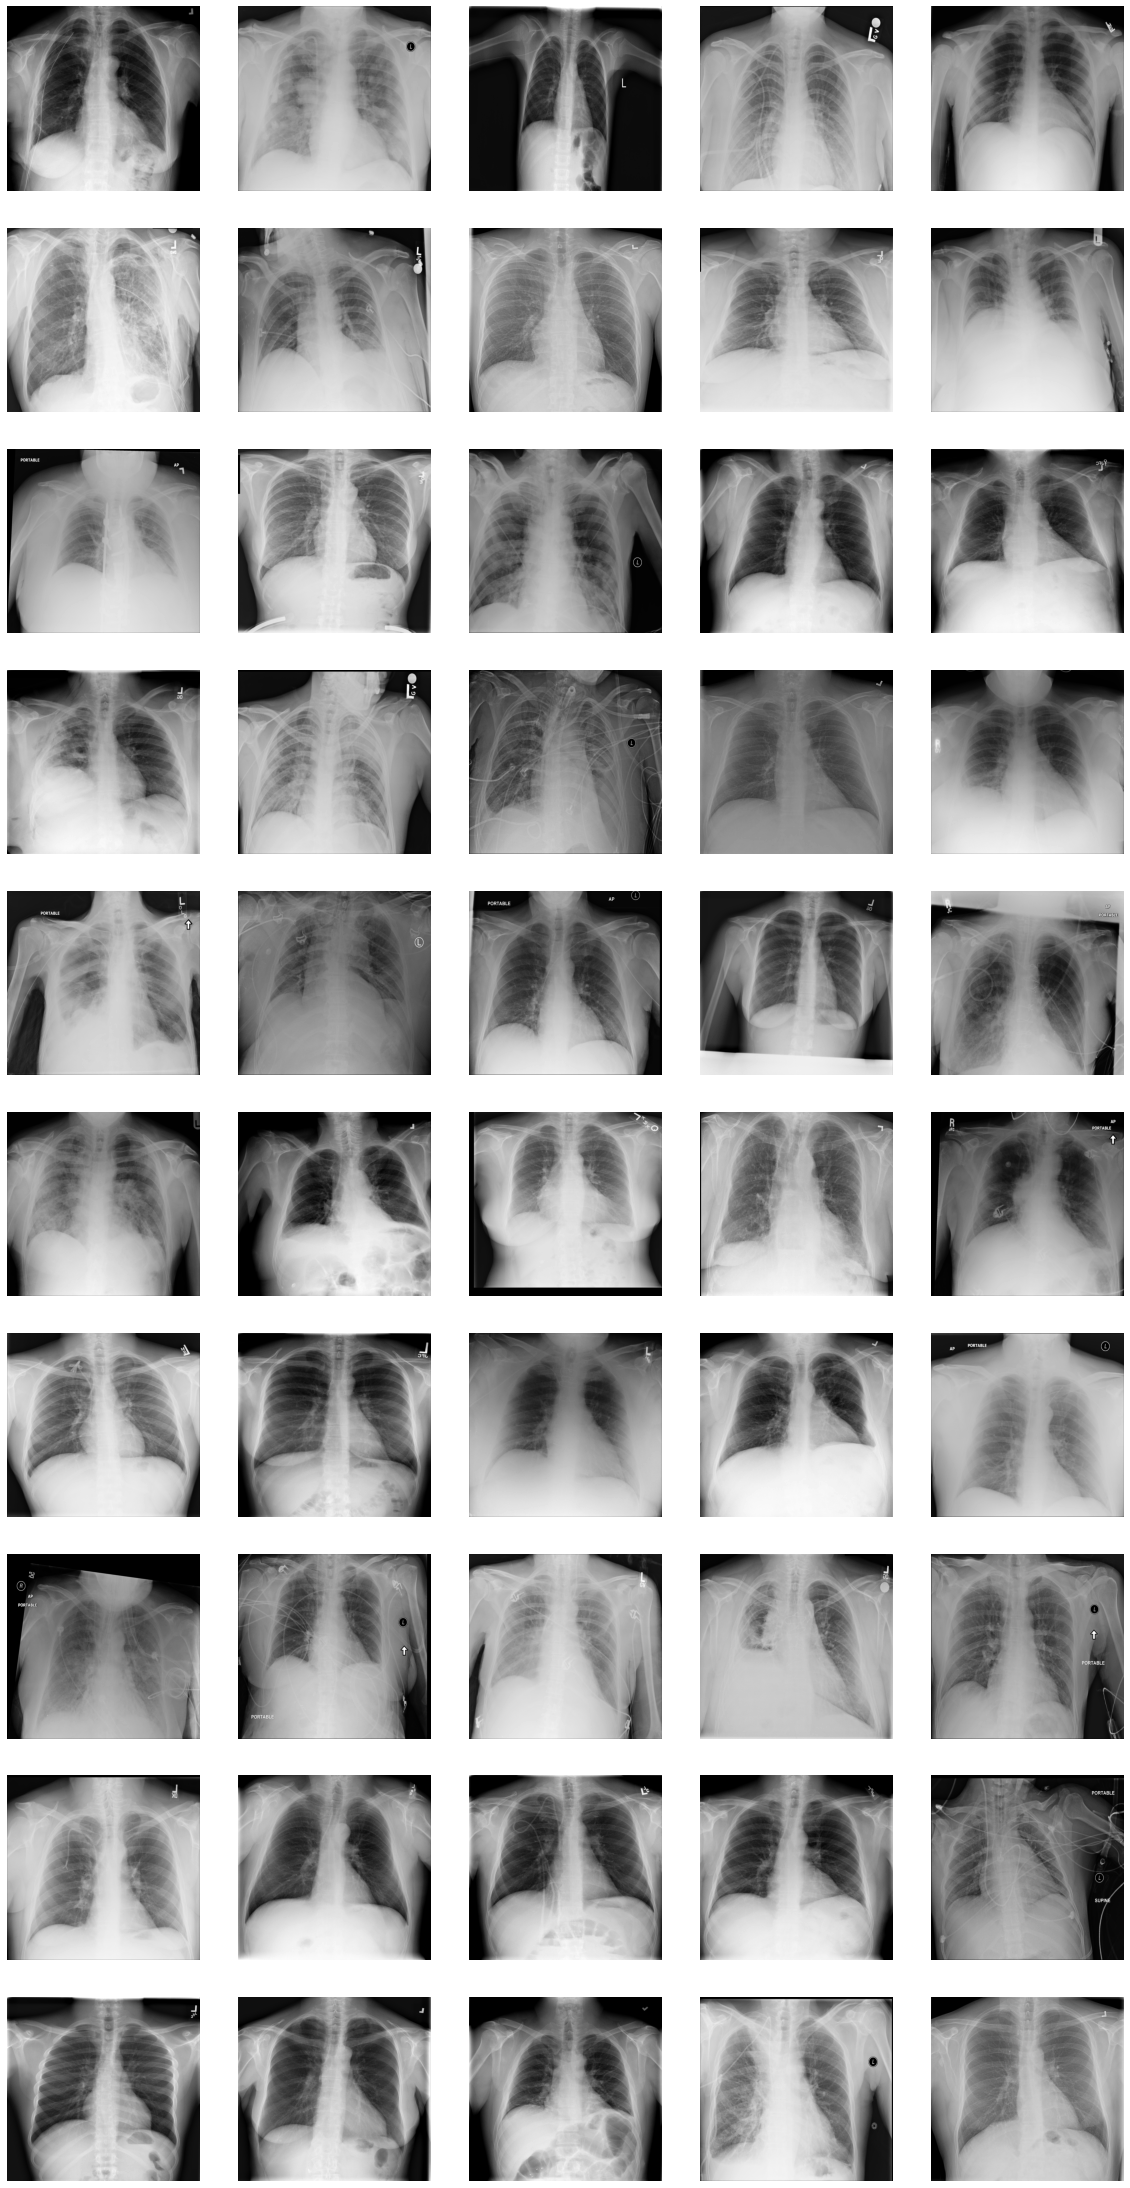

In [45]:
view_images(df.sample(50, random_state = 42)["Image Index"].values)


A travers les images, on voit qu'on a globalement le même format, avec une poitrine au centre de l'image. Cependant, est-ce vraiment le cas sur toutes les images ? En effet, ce sera un travail colossal de regarder chaque image une par une et d'essayer de voir si elle est dans le bon format ou non. Aussi, en regardant sur les images, on peut voir que certaines sont tournées ou on peut voir une bordure noire autour. Si l'effet est léger, il pourrait être utilisé comme augmentation de données pour l'apprentissage en profondeur. Cependant, si l'effet a déformé les images et ne peut pas être utilisé pour l'analyse, il sera intéressant de supprimer ces données de notre jeu de données. Nous pourrions par exemple utiliser l'analyse d'histogramme pour déterminer si l'image est zoomée ou non.

C'est la fin de cette analyse. C'est léger, j'en conviens. Nous aurions pu analyser plus en profondeur les images à travers des histogrammes. Aussi, on pourrait avoir une partie dédiée sur les étiquettes essayant de comprendre la représentation sur les images. Cela pourrait être le problème d'une autre mise à jour ;)

Merci d'avoir lu jusqu'ici. N'hésitez pas si vous avez des remarques ou des commentaires. La prochaine fois, je concentrerai mon travail sur la création d'un modèle d'apprentissage en profondeur à partir de cet ensemble de données. J'espère vous revoir dans le prochain cahier.

In [46]:
df.columns

Index(['Image Index', 'Finding Labels', 'Follow-up #', 'Patient ID',
       'Patient Age', 'Patient Gender', 'View Position', 'OriginalImageWidth',
       'OriginalImageHeight', 'OriginalImagePixelSpacingX',
       'OriginalImagePixelSpacingY', 'Unnamed: 11', 'Edema',
       'Pleural_Thickening', 'Pneumothorax', 'Pneumonia', 'Infiltration',
       'Consolidation', 'Hernia', 'Cardiomegaly', 'Effusion', 'Atelectasis',
       'Fibrosis', 'Emphysema', 'Mass', 'Nodule', 'No Finding'],
      dtype='object')

In [47]:
df_age = df[(df["Patient Age"]> 18) & (df["Patient Age"]< 90)]
df_age.head()

Image Index          Finding Labels  Follow-up #  Patient ID  \
0  00000001_000.png            Cardiomegaly            0           1   
1  00000001_001.png  Cardiomegaly|Emphysema            1           1   
2  00000001_002.png   Cardiomegaly|Effusion            2           1   
3  00000002_000.png              No Finding            0           2   
4  00000003_000.png                  Hernia            0           3   

   Patient Age Patient Gender View Position  OriginalImageWidth  \
0           58              M            PA                2682   
1           58              M            PA                2894   
2           58              M            PA                2500   
3           81              M            PA                2500   
4           81              F            PA                2582   

   OriginalImageHeight  OriginalImagePixelSpacingX  ...  Consolidation  \
0                 2749                       0.143  ...            0.0   
1                 2729                       0.143  ...            0.0   
2                 2048                       0.168  ...            0.0   
3                 2048                       0.171  ...            0.0   
4                 2991                       0.143  ...            0.0   

   Hernia  Cardiomegaly  Effusion  Atelectasis  Fibrosis  Emphysema  Mass  \
0     0.0           1.0       0.0          0.0       0.0        0.0   0.0   
1     0.0           1.0       0.0          0.0       0.0        1.0   0.0   
2     0.0           1.0       1.0          0.0       0.0        0.0   0.0   
3     0.0           0.0       0.0          0.0       0.0        0.0   0.0   
4     1.0           0.0       0.0          0.0       0.0        0.0   0.0   

   Nodule  No Finding  
0     0.0         0.0  
1     0.0         0.0  
2     0.0         0.0  
3     0.0         1.0  
4     0.0         0.0  

[5 rows x 27 columns]

In [48]:
# del df

In [49]:
idx = np.random.permutation(np.arange(len(df_age)))
df_age = df_age.iloc[idx].drop_duplicates(subset='Patient ID')

In [50]:
len(df_age)

29171

In [51]:
data = df_age[['Image Index','No Finding', 'Emphysema', 'Consolidation',
       'Effusion', 'Mass', 'Pleural_Thickening', 'Edema', 'Infiltration',
       'Pneumothorax', 'Cardiomegaly', 'Fibrosis', 'Hernia', 'Atelectasis',
       'Nodule', 'Pneumonia']].copy().reset_index(drop=True)

data.columns = ['Image Index','Normal', 'Emphysema', 'Consolidation',
       'Effusion', 'Mass', 'Pleural_Thickening', 'Edema', 'Infiltration',
       'Pneumothorax', 'Cardiomegaly', 'Fibrosis', 'Hernia', 'Atelectasis',
       'Nodule', 'Pneumonia']
data.head()

Image Index  Normal  Emphysema  Consolidation  Effusion  Mass  \
0  00002350_021.png     0.0        0.0            0.0       1.0   0.0   
1  00018253_052.png     0.0        0.0            0.0       1.0   0.0   
2  00001409_008.png     1.0        0.0            0.0       0.0   0.0   
3  00004006_006.png     0.0        0.0            0.0       0.0   1.0   
4  00019215_000.png     0.0        0.0            0.0       0.0   0.0   

   Pleural_Thickening  Edema  Infiltration  Pneumothorax  Cardiomegaly  \
0                 0.0    0.0           1.0           0.0           0.0   
1                 0.0    0.0           1.0           0.0           0.0   
2                 0.0    0.0           0.0           0.0           0.0   
3                 0.0    0.0           1.0           0.0           0.0   
4                 0.0    0.0           1.0           0.0           0.0   

   Fibrosis  Hernia  Atelectasis  Nodule  Pneumonia  
0       0.0     0.0          0.0     0.0        0.0  
1       0.0     0.0          0.0     0.0        0.0  
2       0.0     0.0          0.0     0.0        0.0  
3       0.0     0.0          0.0     0.0        0.0  
4       0.0     0.0          0.0     1.0        0.0

In [52]:
max(data[data["Normal"]==1.0].sum(axis=1))

C:\Users\derra\AppData\Local\Temp/ipykernel_8880/1612071836.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  max(data[data["Normal"]==1.0].sum(axis=1))


1.0

On peut le voir, quand on a No finding, nous n'avons jamais d'autres maladie trouvé pour la même image, nous considérons que c'est normal.

In [53]:
data.to_csv("donnees_visualisation.csv")

# Debut Akli Code

# Recupération des chemins des images dans input/data

In [54]:
data["Image Path"]=['' for val in data['Image Index']]
data["Image Path"].head()

0    
1    
2    
3    
4    
Name: Image Path, dtype: object

In [55]:
data.loc[data['Image Index']=='00000001_000.png','Image Path']=''
data.loc[data['Image Index']=='00000001_000.png','Image Path']

17561    
Name: Image Path, dtype: object

In [56]:
os.chdir(path)
os.getcwd()

'C:\\Users\\derra\\Downloads\\archive'

## Recuperation valeur DF -> fichier 

In [57]:
# list_directories=['images_00'+str(val) if(val<10) else 'images_0'+str(val) for val in range(1,13,1)]
# print("Liste de repertoire créées avec succés")

# for directory in list_directories:
#     current_directory = directory+"/images"
#     print("Dans le repertoire : ",directory)
#     for file in os.listdir(current_directory):
#         current_file = current_directory+"/"+file
#         data.loc[data['Image Index']==file,'Image Path'] = current_file
#     print("Fin du premier repertoire : ",current_directory)
#     print("Exemple d'image traitée : ",current_file)
    
    
for filename in data["Image Index"]:
    data.loc[data['Image Index']==filename,'Image Path'] = glob.glob(path+'/*/*/'+filename)[0]
data.head()

Image Index  Normal  Emphysema  Consolidation  Effusion  Mass  \
0  00002350_021.png     0.0        0.0            0.0       1.0   0.0   
1  00018253_052.png     0.0        0.0            0.0       1.0   0.0   
2  00001409_008.png     1.0        0.0            0.0       0.0   0.0   
3  00004006_006.png     0.0        0.0            0.0       0.0   1.0   
4  00019215_000.png     0.0        0.0            0.0       0.0   0.0   

   Pleural_Thickening  Edema  Infiltration  Pneumothorax  Cardiomegaly  \
0                 0.0    0.0           1.0           0.0           0.0   
1                 0.0    0.0           1.0           0.0           0.0   
2                 0.0    0.0           0.0           0.0           0.0   
3                 0.0    0.0           1.0           0.0           0.0   
4                 0.0    0.0           1.0           0.0           0.0   

   Fibrosis  Hernia  Atelectasis  Nodule  Pneumonia  \
0       0.0     0.0          0.0     0.0        0.0   
1       0.0     0.0          0.0     0.0        0.0   
2       0.0     0.0          0.0     0.0        0.0   
3       0.0     0.0          0.0     0.0        0.0   
4       0.0     0.0          0.0     1.0        0.0   

                                          Image Path  
0  C:/Users/derra/Downloads/archive\images_002\im...  
1  C:/Users/derra/Downloads/archive\images_008\im...  
2  C:/Users/derra/Downloads/archive\images_002\im...  
3  C:/Users/derra/Downloads/archive\images_003\im...  
4  C:/Users/derra/Downloads/archive\images_009\im...

## Recuperation valeur fichier -> DF

In [58]:
# list_directories=['images_00'+str(val) if(val<10) else 'images_0'+str(val) for val in range(1,13,1)]
# print("Liste de repertoire créées avec succés")

# for directory in list_directories:
#     current_directory = directory+"/images"
#     print("Dans le repertoire : ",directory)
#     for file in os.listdir(current_directory):
#         current_file = current_directory+"/"+file
#         data.loc[data['Image Index']==file,'Image Path'] = current_file
#     print("Fin du premier repertoire : ",current_directory)
#     print("Exemple d'image traitée : ",current_file)

In [59]:
# !pip install tensorflow

In [60]:
# !pip install --upgrade --user pip

In [61]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import os
from glob import glob
import h5py
import shutil
import imgaug as aug
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mimg
import imgaug.augmenters as iaa
from os import listdir, makedirs, getcwd, remove
from os.path import isfile, join, abspath, exists, isdir, expanduser
from PIL import Image
from pathlib import Path
from skimage.io import imread
from skimage.transform import resize
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, SeparableConv2D
from tensorflow.keras.layers import GlobalMaxPooling2D
#from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
from keras.layers.merge import Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import cv2
from keras import backend as K
color = sns.color_palette()
%matplotlib inline

In [62]:
import tensorflow as tf
from tensorflow.keras.models import load_model, Model


sess = tf.compat.v1.Session()
K.set_session(sess)

In [63]:
import tensorflow as tf
from tensorflow.python.keras import backend as K
# Set the seed for hash based operations in python
os.environ['PYTHONHASHSEED'] = '0'

# Set the numpy seed
np.random.seed(111)

# Disable multi-threading in tensorflow ops
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)

# Set the random seed in tensorflow at graph level
tf.compat.v1.set_random_seed(111)

# Define a tensorflow session with above session configs
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)

# Set the session in keras
K.set_session(sess)

# Make the augmentation sequence deterministic
aug.seed(111)

In [64]:
# del data

In [65]:
data["Disease"]=[1.0 if(val!=1.0) else 0.0 for val in data["Normal"]]
data.head()

Image Index  Normal  Emphysema  Consolidation  Effusion  Mass  \
0  00002350_021.png     0.0        0.0            0.0       1.0   0.0   
1  00018253_052.png     0.0        0.0            0.0       1.0   0.0   
2  00001409_008.png     1.0        0.0            0.0       0.0   0.0   
3  00004006_006.png     0.0        0.0            0.0       0.0   1.0   
4  00019215_000.png     0.0        0.0            0.0       0.0   0.0   

   Pleural_Thickening  Edema  Infiltration  Pneumothorax  Cardiomegaly  \
0                 0.0    0.0           1.0           0.0           0.0   
1                 0.0    0.0           1.0           0.0           0.0   
2                 0.0    0.0           0.0           0.0           0.0   
3                 0.0    0.0           1.0           0.0           0.0   
4                 0.0    0.0           1.0           0.0           0.0   

   Fibrosis  Hernia  Atelectasis  Nodule  Pneumonia  \
0       0.0     0.0          0.0     0.0        0.0   
1       0.0     0.0          0.0     0.0        0.0   
2       0.0     0.0          0.0     0.0        0.0   
3       0.0     0.0          0.0     0.0        0.0   
4       0.0     0.0          0.0     1.0        0.0   

                                          Image Path  Disease  
0  C:/Users/derra/Downloads/archive\images_002\im...      1.0  
1  C:/Users/derra/Downloads/archive\images_008\im...      1.0  
2  C:/Users/derra/Downloads/archive\images_002\im...      0.0  
3  C:/Users/derra/Downloads/archive\images_003\im...      1.0  
4  C:/Users/derra/Downloads/archive\images_009\im...      1.0

In [66]:
#Labels : 
#0 for normal
#1 for disease
data["Labels"]=[1 if(val!=1.0) else 0 for val in data["Normal"]]

In [67]:
data_use = data[["Image Path","Image Index","Labels"]]
data_use.head()

Image Path       Image Index  Labels
0  C:/Users/derra/Downloads/archive\images_002\im...  00002350_021.png       1
1  C:/Users/derra/Downloads/archive\images_008\im...  00018253_052.png       1
2  C:/Users/derra/Downloads/archive\images_002\im...  00001409_008.png       0
3  C:/Users/derra/Downloads/archive\images_003\im...  00004006_006.png       1
4  C:/Users/derra/Downloads/archive\images_009\im...  00019215_000.png       1

First try to do multiclass
Set labels for each disease : 


0    19511
1     9660
Name: Labels, dtype: int64


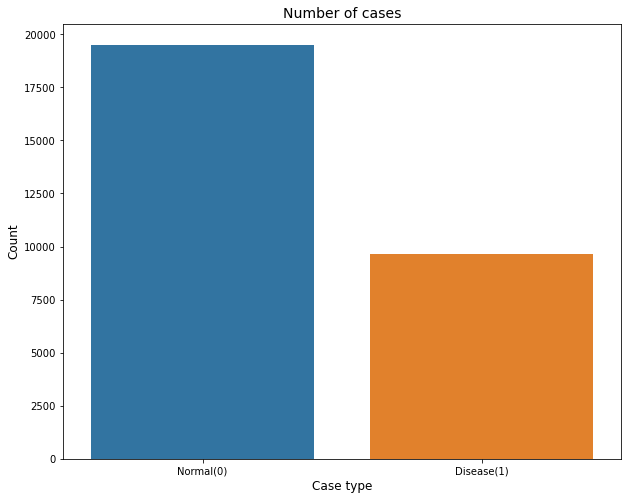

In [68]:
# Get the counts for each class
cases_count = data_use['Labels'].value_counts()
print(cases_count)

# Plot the results 
plt.figure(figsize=(10,8))
sns.barplot(x=cases_count.index, y= cases_count.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Disease(1)'])
plt.show()

We can see that the dataset is unbalanced (which is normal for this type of dataset, but as we joined all the diseases together, we've to be vigilent)

Create dataframe with the images

In [1]:
# Separate Normal and Disease Images
len(data_use)

NameError: name 'data_use' is not defined

In [70]:
data_use_ori = data_use.copy()
del data_use
data_use = data_use_ori.sample(n=len(data_use_ori)//4)
len(data_use)

7292

Let's look at how a normal case is different from that of a disease case. We will look at somes samples from our training data itself.

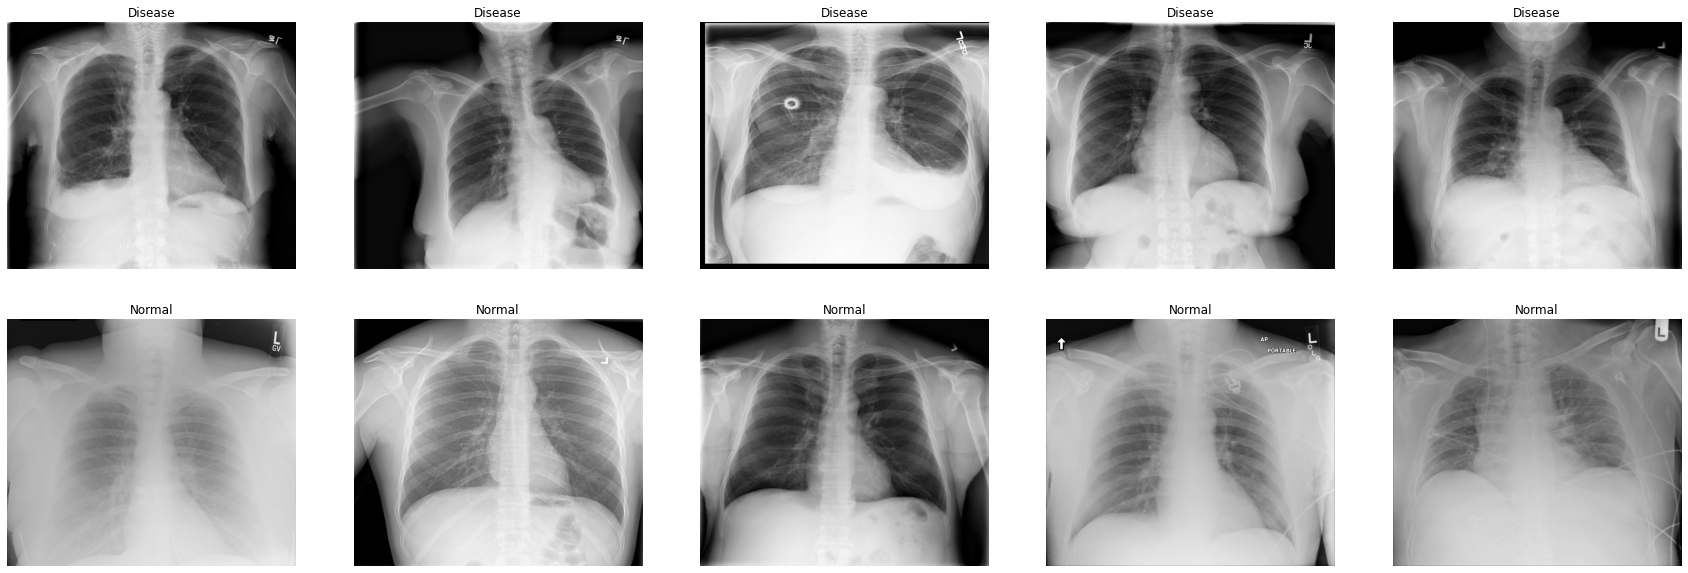

In [71]:
# Get few samples for both the classes
disease_samples = (data_use[data_use['Labels']==1]['Image Path'].iloc[:5]).tolist()
normal_samples = (data_use[data_use['Labels']==0]['Image Path'].iloc[:5]).tolist()

# Concat the data in a single list and del the above two list
samples = disease_samples + normal_samples
del disease_samples, normal_samples

# Plot the data 
f, ax = plt.subplots(2,5, figsize=(30,10))
for i in range(10):
    img = imread(samples[i])
    ax[i//5, i%5].imshow(img, cmap='gray')
    if i<5:
        ax[i//5, i%5].set_title("Disease")
    else:
        ax[i//5, i%5].set_title("Normal")
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_aspect('auto')
plt.show()



If you look carefully, then there are some cases where you won't be able to differentiate between a normal case and a disease case with the naked eye. There is one case in the above plot, at least for me ,which is too much confusing. If we can build a robust classifier, it would be a great assist to the doctor too.



Preparing validation data

Prepare validation data


In [72]:
train, test, label_train, label_test = train_test_split(data_use["Image Path"], data_use["Labels"], test_size=0.25, random_state=42)

In [73]:
train, validation, label_train, label_validation = train_test_split(train,label_train , test_size=0.20, random_state=42)

In [74]:
validation_all_data = pd.concat([pd.DataFrame(validation),pd.DataFrame(label_validation)],axis=1)
train_all_data = pd.concat([pd.DataFrame(train),pd.DataFrame(label_train)],axis=1)


In [97]:
test_all_data = pd.concat([pd.DataFrame(test),pd.DataFrame(label_test)],axis=1)


In [75]:
#### Get the list of all the images
normal_cases = train_all_data[train_all_data["Labels"]==0]["Image Path"]
disease_cases = train_all_data[train_all_data["Labels"]==1]["Image Path"]
#### An empty list. We will insert the data into this list in (img_path, label) format
train_data = []

#### Go through all the normal cases. The label for these cases will be 0
for img in normal_cases:
    train_data.append((img,0))

#### Go through all the pneumonia cases. The label for these cases will be 1
for img in disease_cases:
    train_data.append((img, 1))

#### Get a pandas dataframe from the data we have in our list 
train_data = pd.DataFrame(train_data, columns=['Image Path', 'Labels'],index=None)

#### Shuffle the data 
train_data = train_data.sample(frac=1.).reset_index(drop=True)

#### How the dataframe looks like?
train_data.head()

Image Path  Labels
0  C:/Users/derra/Downloads/archive\images_012\im...       0
1  C:/Users/derra/Downloads/archive\images_007\im...       1
2  C:/Users/derra/Downloads/archive\images_010\im...       0
3  C:/Users/derra/Downloads/archive\images_010\im...       0
4  C:/Users/derra/Downloads/archive\images_009\im...       0

## convert validation data

In [76]:
# List that are going to contain validation images data and the corresponding labels
valid_data = []
valid_labels = []

# Some images are in grayscale while majority of them contains 3 channels. So, if the image is grayscale, we will convert into a image with 3 channels.
# We will normalize the pixel values and resizing all the images to 224x224 
normal_cases = validation_all_data[validation_all_data["Labels"]==0]["Image Path"]
disease_cases = validation_all_data[validation_all_data["Labels"]==1]["Image Path"]
# Normal cases
print("Start Normal_cases")
for img in normal_cases :
    img = cv2.imread(str(img))
    img = cv2.resize(img, (224,224))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = to_categorical(0, num_classes=2)
    valid_data.append(img)
    valid_labels.append(label)

print("Start Disease_cases")
# Disease cases        
for img in disease_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (224,224))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = to_categorical(1, num_classes=2)
    valid_data.append(img)
    valid_labels.append(label)
    
# Convert the list into numpy arrays
valid_data = np.array(valid_data)
valid_labels = np.array(valid_labels)

print("Total number of validation examples: ", valid_data.shape)
print("Total number of labels:", valid_labels.shape)

Start Normal_cases
Start Disease_cases
Total number of validation examples:  (1094, 224, 224, 3)
Total number of labels: (1094, 2)


## Convert train data

In [77]:
# import time
# start = time.process_time()
# # your code here


# # List that are going to contain validation images data and the corresponding labels
# train_data = []
# train_labels = []

# # Some images are in grayscale while majority of them contains 3 channels. So, if the image is grayscale, we will convert into a image with 3 channels.
# # We will normalize the pixel values and resizing all the images to 224x224 
# normal_cases = train_all_data[train_all_data["Labels"]==0]["Image Path"]
# disease_cases = train_all_data[train_all_data["Labels"]==1]["Image Path"]
# # Normal cases
# print("Start Normal_cases")
# print("Start time = ",start)
# for img in normal_cases :
#     img = cv2.imread(str(img))
#     img = cv2.resize(img, (224,224))
#     if img.shape[2] ==1:
#         img = np.dstack([img, img, img])
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     img =2 img.astype(np.float32)/255.
#     label = to_categorical(0, num_classes=2)
#     train_data.append(img)
#     train_labels.append(label)

# end_1 =time.process_time()
# print("Time taken =",end_1 - start)

# print("Start Disease_cases")
# print("Start time = ",end_1)
# # Disease cases        
# for img in disease_cases:
#     img = cv2.imread(str(img))
#     img = cv2.resize(img, (224,224))
#     if img.shape[2] ==1:
#         img = np.dstack([img, img, img])
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     img = img.astype(np.float32)/255.
#     label = to_categorical(1, num_classes=2)
#     train_data.append(img)
#     train_labels.append(label)

# end_2 =time.process_time()
# print("Time taken = ",time.process_time() - start)

# # Convert the list into numpy arrays
# train_data = np.array(train_data)
# train_labels = np.array(train_labels)

# print("Total number of validation examples: ", valid_data.shape)
# print("Total number of labels:", valid_labels.shape)

In [78]:
# ['Image Index', 'Normal', 'Emphysema', 'Consolidation', 'Effusion', 'Mass', 'Pleural_Thickening', 'Edema', 'Infiltration', 'Pneumothorax','Cardiomegaly', 'Fibrosis', 'Hernia', 'Atelectasis', 'Nodule','Pneumonia', 'Image Path']

## Construction du model

In [79]:
def build_model():
    input_img = Input(shape=(224,224,3), name='ImageInput')
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv1_1')(input_img)
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv1_2')(x)
    x = MaxPooling2D((2,2), name='pool1')(x)
    
    x = SeparableConv2D(128, (3,3), activation='relu', padding='same', name='Conv2_1')(x)
    x = SeparableConv2D(128, (3,3), activation='relu', padding='same', name='Conv2_2')(x)
    x = MaxPooling2D((2,2), name='pool2')(x)
    
    x = SeparableConv2D(256, (3,3), activation='relu', padding='same', name='Conv3_1')(x)
    x = BatchNormalization(name='bn1')(x)
    x = SeparableConv2D(256, (3,3), activation='relu', padding='same', name='Conv3_2')(x)
    x = BatchNormalization(name='bn2')(x)
    x = SeparableConv2D(256, (3,3), activation='relu', padding='same', name='Conv3_3')(x)
    x = MaxPooling2D((2,2), name='pool3')(x)
    
    x = SeparableConv2D(512, (3,3), activation='relu', padding='same', name='Conv4_1')(x)
    x = BatchNormalization(name='bn3')(x)
    x = SeparableConv2D(512, (3,3), activation='relu', padding='same', name='Conv4_2')(x)
    x = BatchNormalization(name='bn4')(x)
    x = SeparableConv2D(512, (3,3), activation='relu', padding='same', name='Conv4_3')(x)
    x = MaxPooling2D((2,2), name='pool4')(x)
    
    x = Flatten(name='flatten')(x)
    x = Dense(1024, activation='relu', name='fc1')(x)
    x = Dropout(0.7, name='dropout1')(x)
    x = Dense(512, activation='relu', name='fc2')(x)
    x = Dropout(0.5, name='dropout2')(x)
    x = Dense(2, activation='softmax', name='fc3')(x)
    
    model = Model(inputs=input_img, outputs=x)
    return model

In [80]:
model =  build_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ImageInput (InputLayer)     [(None, 224, 224, 3)]     0         
                                                                 
 Conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 Conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 Conv2_1 (SeparableConv2D)   (None, 112, 112, 128)     8896      
                                                                 
 Conv2_2 (SeparableConv2D)   (None, 112, 112, 128)     17664     
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)       0     

## Data Augmentation

In [81]:
# Augmentation sequence 
seq = iaa.OneOf([
    iaa.Fliplr(), # horizontal flips
    iaa.Affine(rotate=20), # roatation
    iaa.Multiply((1.2, 1.5))]) #random brightness

## Gen

In [82]:
def data_gener(data, batch_size):
#     print("Dans la fonction")
    # Get total number of samples in the data
    n = len(data)
    steps = n//batch_size
    print("steps = ",steps)
    # Define two numpy arrays for containing batch data and labels
    batch_data = np.zeros((batch_size, 224, 224, 3), dtype=np.float32)
    batch_labels = np.zeros((batch_size,2), dtype=np.float32)

    # Get a numpy array of all the indices of the input data
    indices = np.arange(n)
    
    # Initialize a counter
    i =0
    while True:
        np.random.shuffle(indices)
        # Get the next batch 
        count = 0
        next_batch = indices[(i*batch_size):(i+1)*batch_size]
        for j, idx in enumerate(next_batch):
            img_name = data.iloc[idx]['Image Path']
            label = data.iloc[idx]['Labels']
            
            # one hot encoding
            encoded_label = to_categorical(label, num_classes=2)
            # read the image and resize
            img = cv2.imread(str(img_name))
            img = cv2.resize(img, (224,224))
            
            # check if it's grayscale
            if img.shape[2]==1:
                img = np.dstack([img, img, img])
            
            # cv2 reads in BGR mode by default
            orig_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            # normalize the image pixels
            orig_img = img.astype(np.float32)/255.
            
            batch_data[count] = orig_img
            batch_labels[count] = encoded_label
            
            # generating more samples of the undersampled class
#             print("label = ",label)
            if label==1 and count < batch_size-2:
#                 print("Dans l'augmentation")
                aug_img1 = seq.augment_image(img)
                aug_img2 = seq.augment_image(img)
                aug_img1 = cv2.cvtColor(aug_img1, cv2.COLOR_BGR2RGB)
                aug_img2 = cv2.cvtColor(aug_img2, cv2.COLOR_BGR2RGB)
                aug_img1 = aug_img1.astype(np.float32)/255.
                aug_img2 = aug_img2.astype(np.float32)/255.

                batch_data[count+1] = aug_img1
                batch_labels[count+1] = encoded_label
                batch_data[count+2] = aug_img2
                batch_labels[count+2] = encoded_label
                count +=2
            
            else:
                count+=1
            
            if count==batch_size-1:
                break
            
        i+=1
        yield batch_data, batch_labels
            
        if i>=steps:
            i=0
        

0    2960
1    1415
Name: Labels, dtype: int64


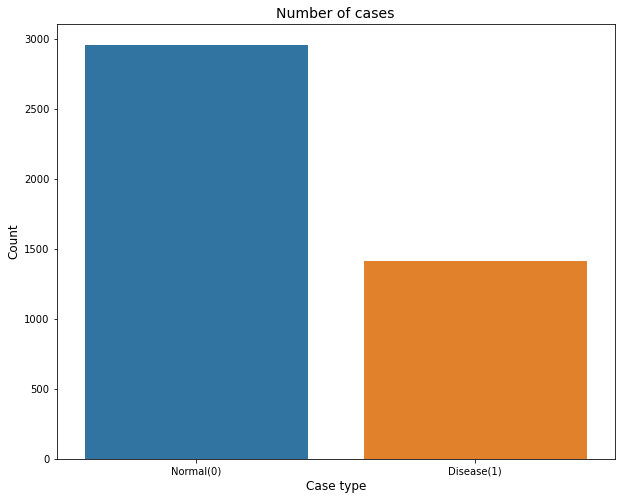

In [83]:
# Get the counts for each class
cases_count = train_data['Labels'].value_counts()
print(cases_count)

# Plot the results 
plt.figure(figsize=(10,8))
sns.barplot(x=cases_count.index, y= cases_count.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Disease(1)'])
plt.show()

## Utilisation du transfert learning a traver les poids de imagenets

In [84]:
# Open the VGG16 weight file
f = h5py.File('vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5', 'r')

# Select the layers for which you want to set weight.

w,b = f['block1_conv1']['block1_conv1_W_1:0'], f['block1_conv1']['block1_conv1_b_1:0']
model.layers[1].set_weights = [w,b]

w,b = f['block1_conv2']['block1_conv2_W_1:0'], f['block1_conv2']['block1_conv2_b_1:0']
model.layers[2].set_weights = [w,b]

w,b = f['block2_conv1']['block2_conv1_W_1:0'], f['block2_conv1']['block2_conv1_b_1:0']
model.layers[4].set_weights = [w,b]

w,b = f['block2_conv2']['block2_conv2_W_1:0'], f['block2_conv2']['block2_conv2_b_1:0']
model.layers[5].set_weights = [w,b]

f.close()
model.summary()  

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ImageInput (InputLayer)     [(None, 224, 224, 3)]     0         
                                                                 
 Conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 Conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 Conv2_1 (SeparableConv2D)   (None, 112, 112, 128)     8896      
                                                                 
 Conv2_2 (SeparableConv2D)   (None, 112, 112, 128)     17664     
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)       0     

### Initialisation de l'optimizer Adam

In [85]:
# opt = RMSprop(lr=0.0001, decay=1e-6)
opt = Adam(learning_rate=0.0001, decay=1e-5)
es = EarlyStopping(patience=5)
chkpt = ModelCheckpoint(filepath=, save_best_only=True, save_weights_only=True)
model.compile(loss='binary_crossentropy', metrics=['accuracy'],optimizer=opt)

In [129]:
batch_size = 64
nb_epochs = 2

# Get a train data generator
train_data_gen = data_gener(data=train_data, batch_size=batch_size)

# Define the number of training steps
nb_train_steps = train_data.shape[0]//batch_size

print("Number of training and validation steps: {} and {}".format(nb_train_steps, len(valid_data)))

Number of training and validation steps: 68 and 1094


In [137]:
# # # Fit the model
history = model.fit(train_data_gen, epochs=nb_epochs,steps_per_epoch=nb_train_steps,validation_data=(valid_data, valid_labels),callbacks=[es,chkpt])

Epoch 1/2
52/68 [=====================>........] - ETA: 13:00 - loss: 0.6931 - accuracy: 0.5024

KeyboardInterrupt: 

In [107]:
model = history.model

In [131]:
model

In [90]:
import os

import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)

2.8.0


In [96]:
os.listdir()

['.ipynb_checkpoints',
 'ARXIV_V5_CHESTXRAY.pdf',
 'BBox_List_2017.csv',
 'best_model_todate.data-00000-of-00001',
 'best_model_todate.index',
 'checkpoint',
 'Code_projet.ipynb',
 'Data_Entry_2017.csv',
 'donnees_visualisation.csv',
 'FAQ_CHESTXRAY.pdf',
 'images_001',
 'images_002',
 'images_003',
 'images_004',
 'images_005',
 'images_006',
 'images_007',
 'images_008',
 'images_009',
 'images_010',
 'images_011',
 'images_012',
 'LOG_CHESTXRAY.pdf',
 'README_CHESTXRAY.pdf',
 'test_list.txt',
 'train_val_list.txt',
 'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5']

In [95]:
model.load_weights("best_model_todate")

In [99]:
# Preparing test data

test_data = []
test_labels = []

# Some images are in grayscale while majority of them contains 3 channels. So, if the image is grayscale, we will convert into a image with 3 channels.
# We will normalize the pixel values and resizing all the images to 224x224 
normal_cases = test_all_data[test_all_data["Labels"]==0]["Image Path"]
disease_cases = test_all_data[test_all_data["Labels"]==1]["Image Path"]
# Normal cases



for img in normal_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (224,224))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = to_categorical(0, num_classes=2)
    test_data.append(img)
    test_labels.append(label)
                      
for img in disease_cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (224,224))
    if img.shape[2] ==1:
        img = np.dstack([img, img, img])
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = to_categorical(1, num_classes=2)
    test_data.append(img)
    test_labels.append(label)
    

test_data = np.array(test_data)
test_labels = np.array(test_labels)

print("Total number of test examples: ", test_data.shape)
print("Total number of labels:", test_labels.shape)

Total number of test examples:  (1823, 224, 224, 3)
Total number of labels: (1823, 2)


In [119]:
test_labels[1300]
test_data[1300]

array([[[0.8784314 , 0.8784314 , 0.8784314 ],
        [0.5921569 , 0.5921569 , 0.5921569 ],
        [0.4392157 , 0.4392157 , 0.4392157 ],
        ...,
        [0.9882353 , 0.9882353 , 0.9882353 ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.5019608 , 0.5019608 , 0.5019608 ],
        [0.2784314 , 0.2784314 , 0.2784314 ],
        [0.14901961, 0.14901961, 0.14901961],
        ...,
        [0.93333334, 0.93333334, 0.93333334],
        [0.95686275, 0.95686275, 0.95686275],
        [0.9882353 , 0.9882353 , 0.9882353 ]],

       [[0.22352941, 0.22352941, 0.22352941],
        [0.09411765, 0.09411765, 0.09411765],
        [0.04313726, 0.04313726, 0.04313726],
        ...,
        [0.7764706 , 0.7764706 , 0.7764706 ],
        [0.8392157 , 0.8392157 , 0.8392157 ],
        [0.92941177, 0.92941177, 0.92941177]],

       ...,

       [[0.04705882, 0.04705882, 0.04705882],
        [0.04705882, 0.04705882, 0.04705882],
        [0.04705882, 0

In [125]:
test_data.shape

(1823, 224, 224, 3)

In [127]:
test_data[1300:1301].shape

(1, 224, 224, 3)

Stcok

In [135]:
model_ori = model
history_ori = history

In [132]:
model.evaluate(np.array(test_data[1300:1301]), np.array(test_labels[1300:1301]), batch_size=16)

1/1 [==============================] - 0s 147ms/step - loss: 0.6952 - accuracy: 0.0000e+00


[0.6951602697372437, 0.0]

In [108]:
# Evaluation on test dataset
test_loss, test_score = model.evaluate(test_data, test_labels, batch_size=16)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)

114/114 [==============================] - 158s 1s/step - loss: 0.6928 - accuracy: 0.6775
Loss on test set:  0.6927505135536194
Accuracy on test set:  0.6774547696113586


In [133]:
# Get predictions
preds = model.predict(test_data, batch_size=16)
preds = np.argmax(preds, axis=-1)

# Original labels
orig_test_labels = np.argmax(test_labels, axis=-1)

print(orig_test_labels.shape)
print(preds.shape)

(1823,)
(1823,)


<Figure size 432x288 with 0 Axes>

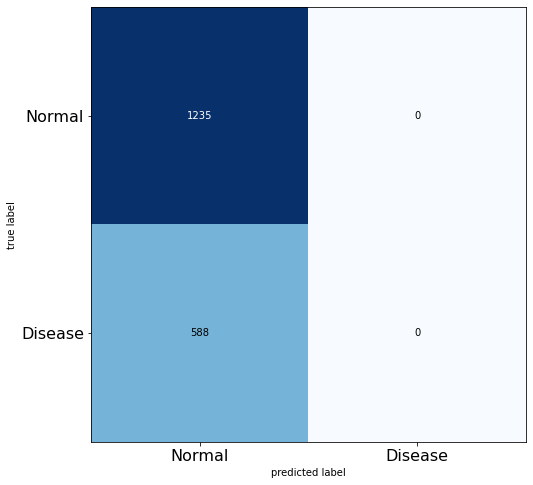

In [134]:
# Get the confusion matrix
cm  = confusion_matrix(orig_test_labels, preds)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(2), ['Normal', 'Disease'], fontsize=16)
plt.yticks(range(2), ['Normal', 'Disease'], fontsize=16)
plt.show()

In [ ]:
# Calculate Precision and Recall
tn, fp, fn, tp = cm.ravel()

precision = tp/(tp+fp)
recall = tp/(tp+fn)

print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))

In [ ]:

47/68 [===================>..........] - ETA: 15:16 - loss: 0.6932 - accuracy: 0.4864